In [1]:
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
from datapackage import Package

package = Package('https://datahub.io/machine-learning/kddcup99/datapackage.json')

# print list of all resources:
print(package.resource_names)


['validation_report', 'kddcup99_csv', 'kddcup99_json', 'kddcup99_zip', 'kddcup99_csv_preview', 'kddcup99']


In [3]:
import pandas as pd
df = pd.read_csv("kddcup99.csv")

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


## Import Packages

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Dataset Exploration

### Shape of the data

In [6]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 494020
Total Number of columns : 42


### Below we can see the features involved in the data

In [7]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

### Describing Data  
The standard deviation of balance, duration and pdays is greater than one third of the mean, distrubution would be spreaded out around the mean, we will see this in visualisation section.

In [8]:
df_transpose = df.describe().T
df_transpose

,count,mean,std,min,25%,50%,75%,max
duration,494020.0,47.979400,707.747185,0.0,0.00,0.0,0.00,58329.0
src_bytes,494020.0,3025.615744,988219.101225,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494020.0,868.530774,33040.034672,0.0,0.00,0.0,0.00,5155468.0
land,494020.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494020.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494020.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494020.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494020.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494020.0,0.148245,0.355343,0.0,0.00,0.0,0.00,1.0
lnum_compromised,494020.0,0.010212,1.798328,0.0,0.00,0.0,0.00,884.0


###  Five point summary

In [9]:
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
duration,0.0,0.00,0.0,0.00,58329.0
src_bytes,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,0.0,0.00,0.0,0.00,5155468.0
land,0.0,0.00,0.0,0.00,1.0
wrong_fragment,0.0,0.00,0.0,0.00,3.0
urgent,0.0,0.00,0.0,0.00,3.0
hot,0.0,0.00,0.0,0.00,30.0
num_failed_logins,0.0,0.00,0.0,0.00,5.0
logged_in,0.0,0.00,0.0,0.00,1.0
lnum_compromised,0.0,0.00,0.0,0.00,884.0


### Lets See if there is any Null Values
There is no null value in the data

In [10]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
df.isnull().values.any()

False

## Sometimes we see '?' as null value, So lets just check it.

In [12]:
for value in df.columns:
     print(value,":", sum(df[value] == '?'))

duration : 0
protocol_type : 0
service : 0
flag : 0
src_bytes : 0
dst_bytes : 0
land : 0
wrong_fragment : 0
urgent : 0
hot : 0
num_failed_logins : 0
logged_in : 0
lnum_compromised : 0
lroot_shell : 0
lsu_attempted : 0
lnum_root : 0
lnum_file_creations : 0
lnum_shells : 0
lnum_access_files : 0
lnum_outbound_cmds : 0
is_host_login : 0
is_guest_login : 0
count : 0
srv_count : 0
serror_rate : 0
srv_serror_rate : 0
rerror_rate : 0
srv_rerror_rate : 0
same_srv_rate : 0
diff_srv_rate : 0
srv_diff_host_rate : 0
dst_host_count : 0
dst_host_srv_count : 0
dst_host_same_srv_rate : 0
dst_host_diff_srv_rate : 0
dst_host_same_src_port_rate : 0
dst_host_srv_diff_host_rate : 0
dst_host_serror_rate : 0
dst_host_srv_serror_rate : 0
dst_host_rerror_rate : 0
dst_host_srv_rerror_rate : 0
label : 0


### Data types involved in the data

In [13]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

### Converting Object to category

In [15]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     494020 non-null  int64   
 1   protocol_type                494020 non-null  category
 2   service                      494020 non-null  category
 3   flag                         494020 non-null  category
 4   src_bytes                    494020 non-null  int64   
 5   dst_bytes                    494020 non-null  int64   
 6   land                         494020 non-null  int64   
 7   wrong_fragment               494020 non-null  int64   
 8   urgent                       494020 non-null  int64   
 9   hot                          494020 non-null  int64   
 10  num_failed_logins            494020 non-null  int64   
 11  logged_in                    494020 non-null  int64   
 12  lnum_compromised             494020 non-null

#### This help us to know that there's various factors on which attacks depends.


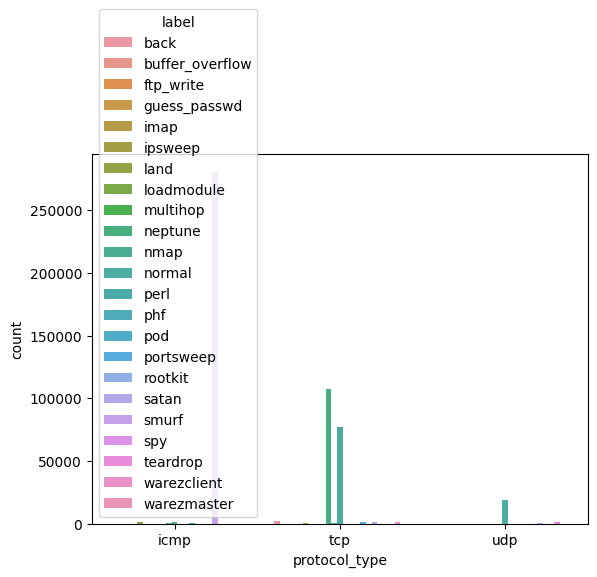

In [17]:
sns.countplot(x = 'protocol_type',hue = "label",data = df)
plt.show()

Guest Login vs Traffic status
Influence of guest login


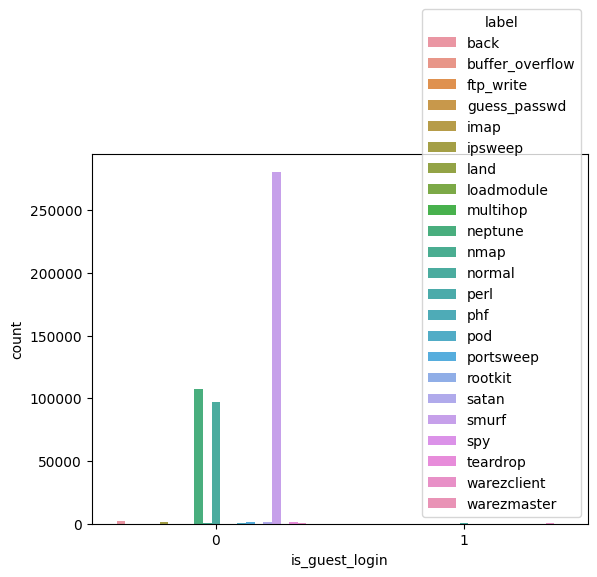

In [18]:
sns.countplot(x = 'is_guest_login',hue = "label",data = df)
print("Guest Login vs Traffic status")
print('Influence of guest login')
plt.show()

### By analysing the above two graphs we came to know that, Most of the UDP and tcp protocols denote the normal traffic. It also means that UDP and TCP are more vulnerable in compare with others. If it is not a guest login then more chance the traffic denotes DOS attack.

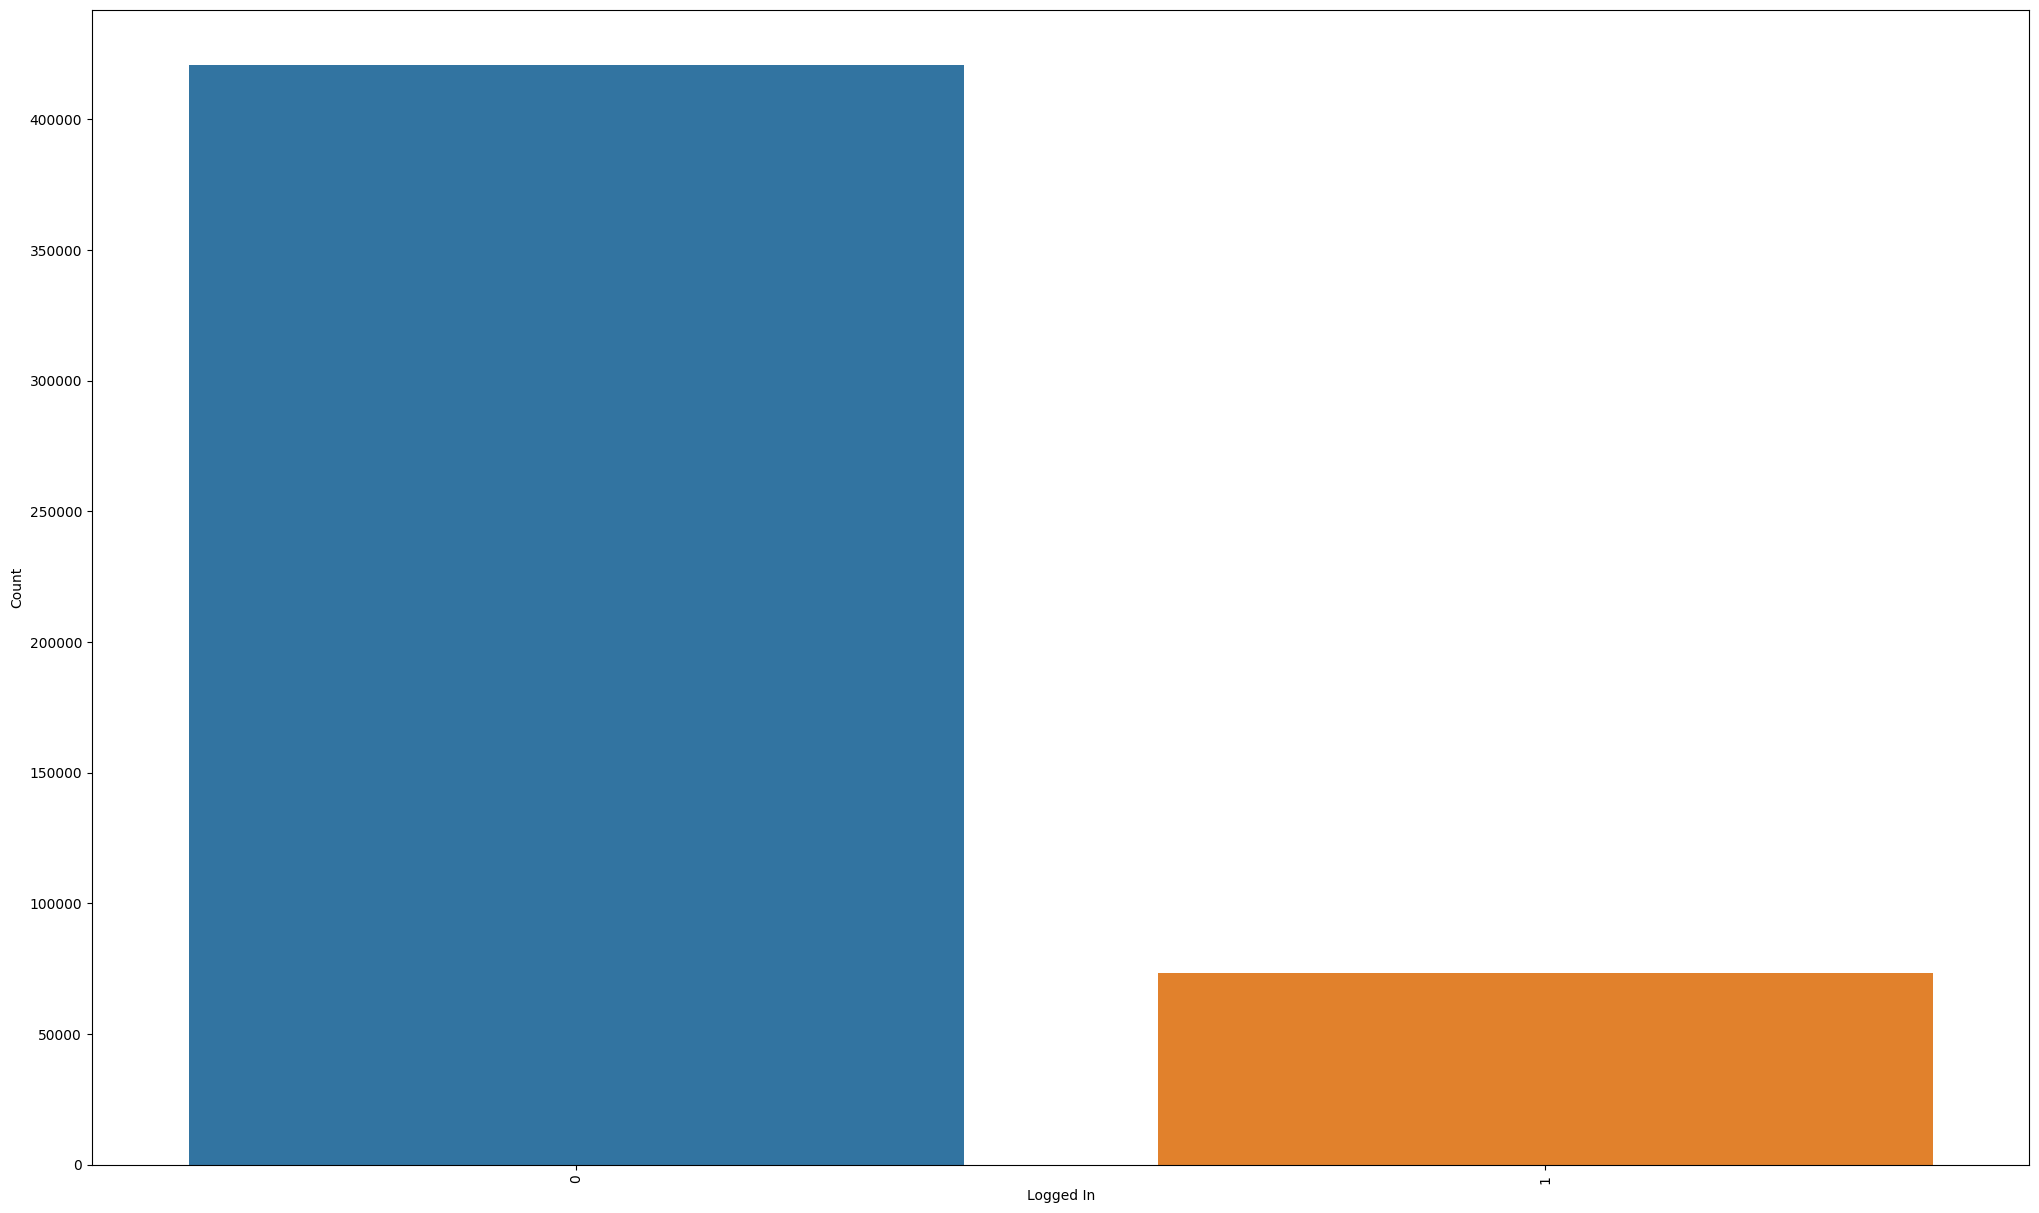

In [19]:
df5 = pd.DataFrame(columns = ['Logged_In'])
df5['Logged_In']=[each for each in df.logged_in.unique()]
df5['Count']=[len(df[df.logged_in==each]) for each in df5.Logged_In]
df5=df5.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df5.Logged_In.head(50), y=df5.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Logged In')
plt.ylabel('Count')
plt.show()

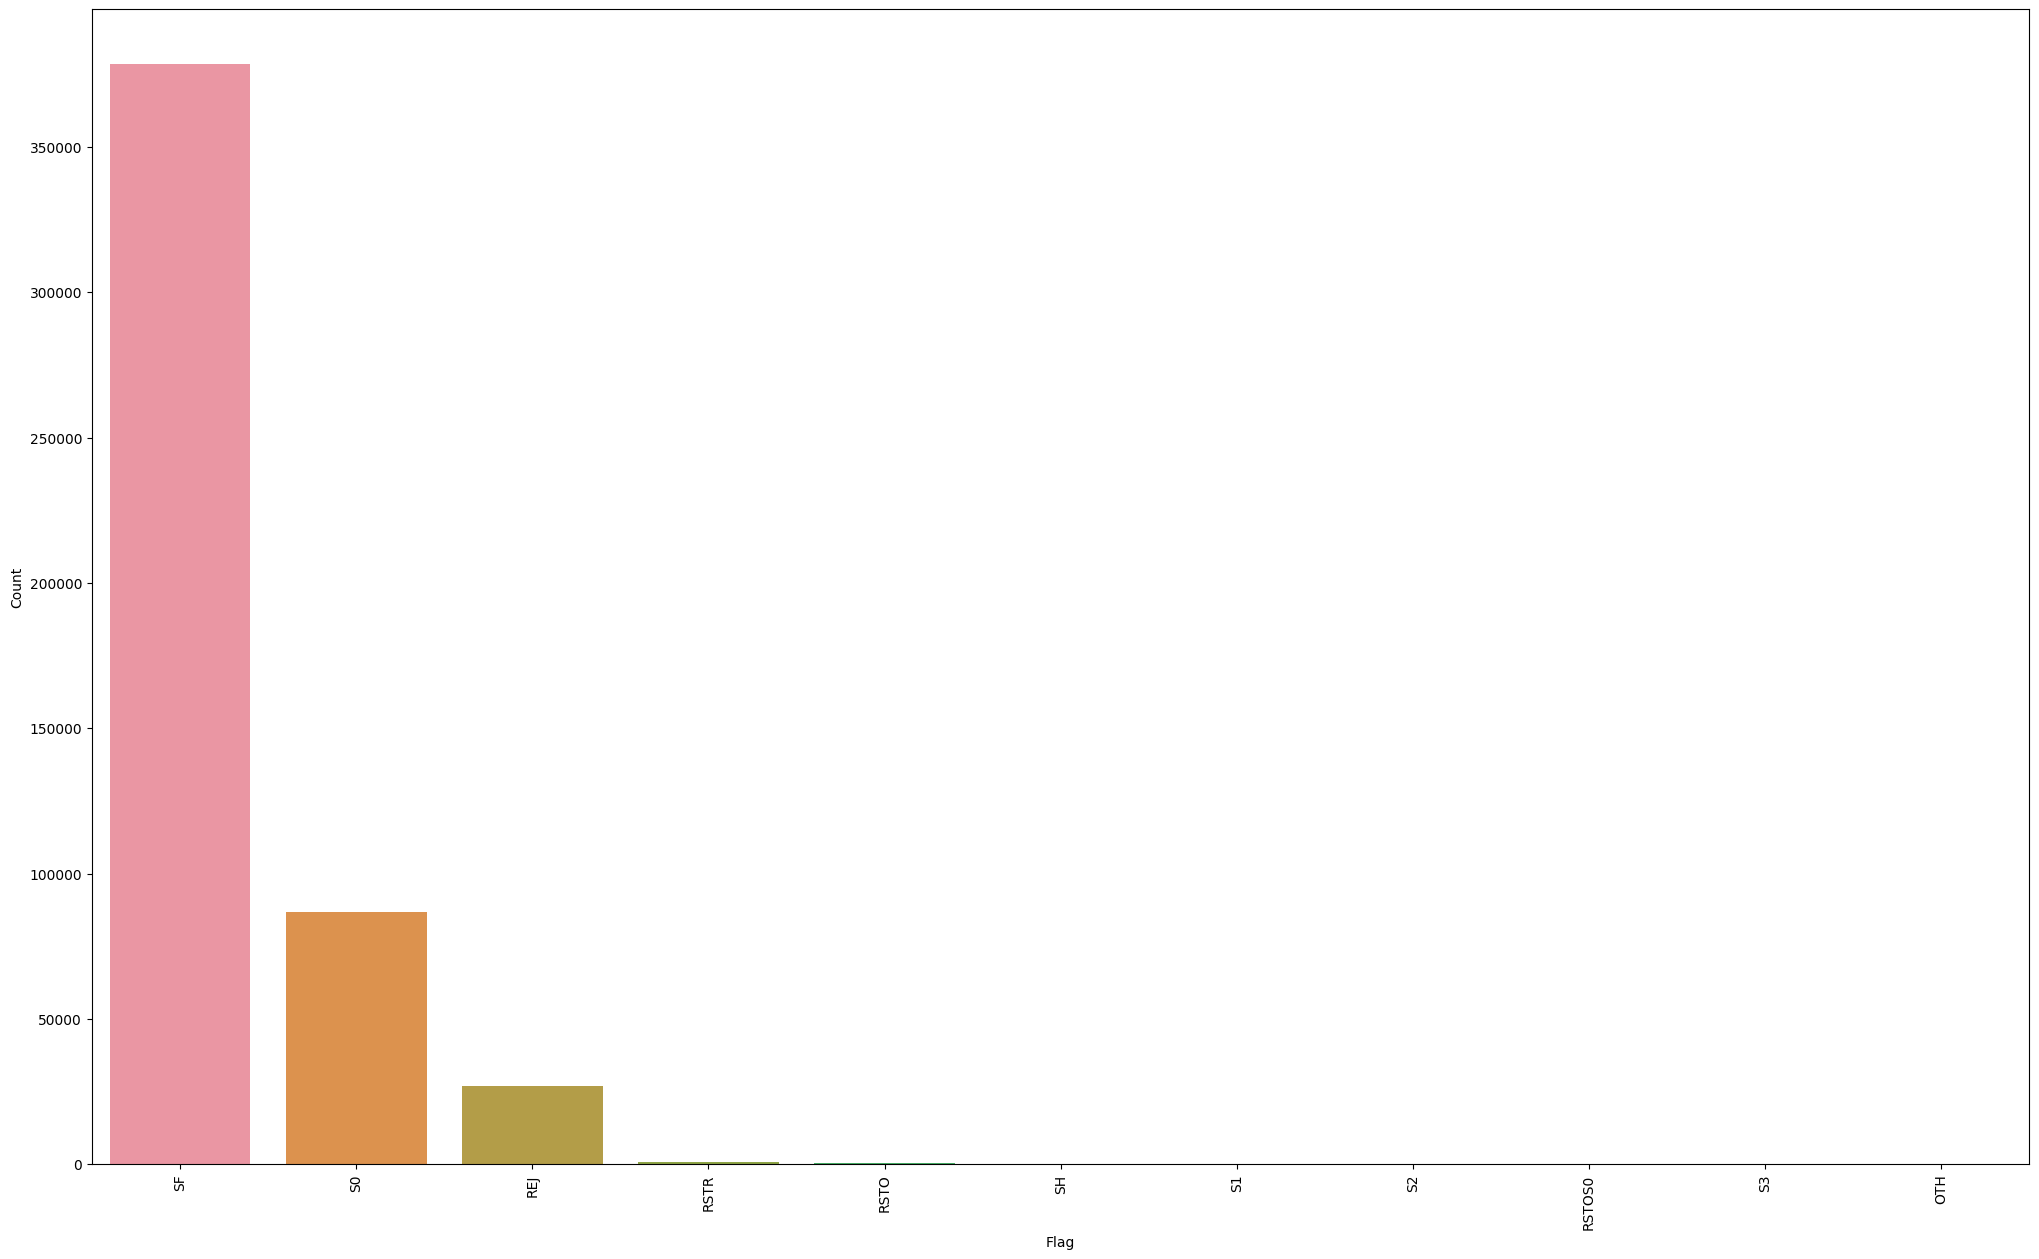

In [20]:
df4 = pd.DataFrame(columns = ['Flag'])
df4['Flag']=[each for each in df.flag.unique()]
df4['Count']=[len(df[df.flag==each]) for each in df4.Flag]
df4=df4.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df4.Flag.head(50), y=df4.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Flag')
plt.ylabel('Count')
plt.show()

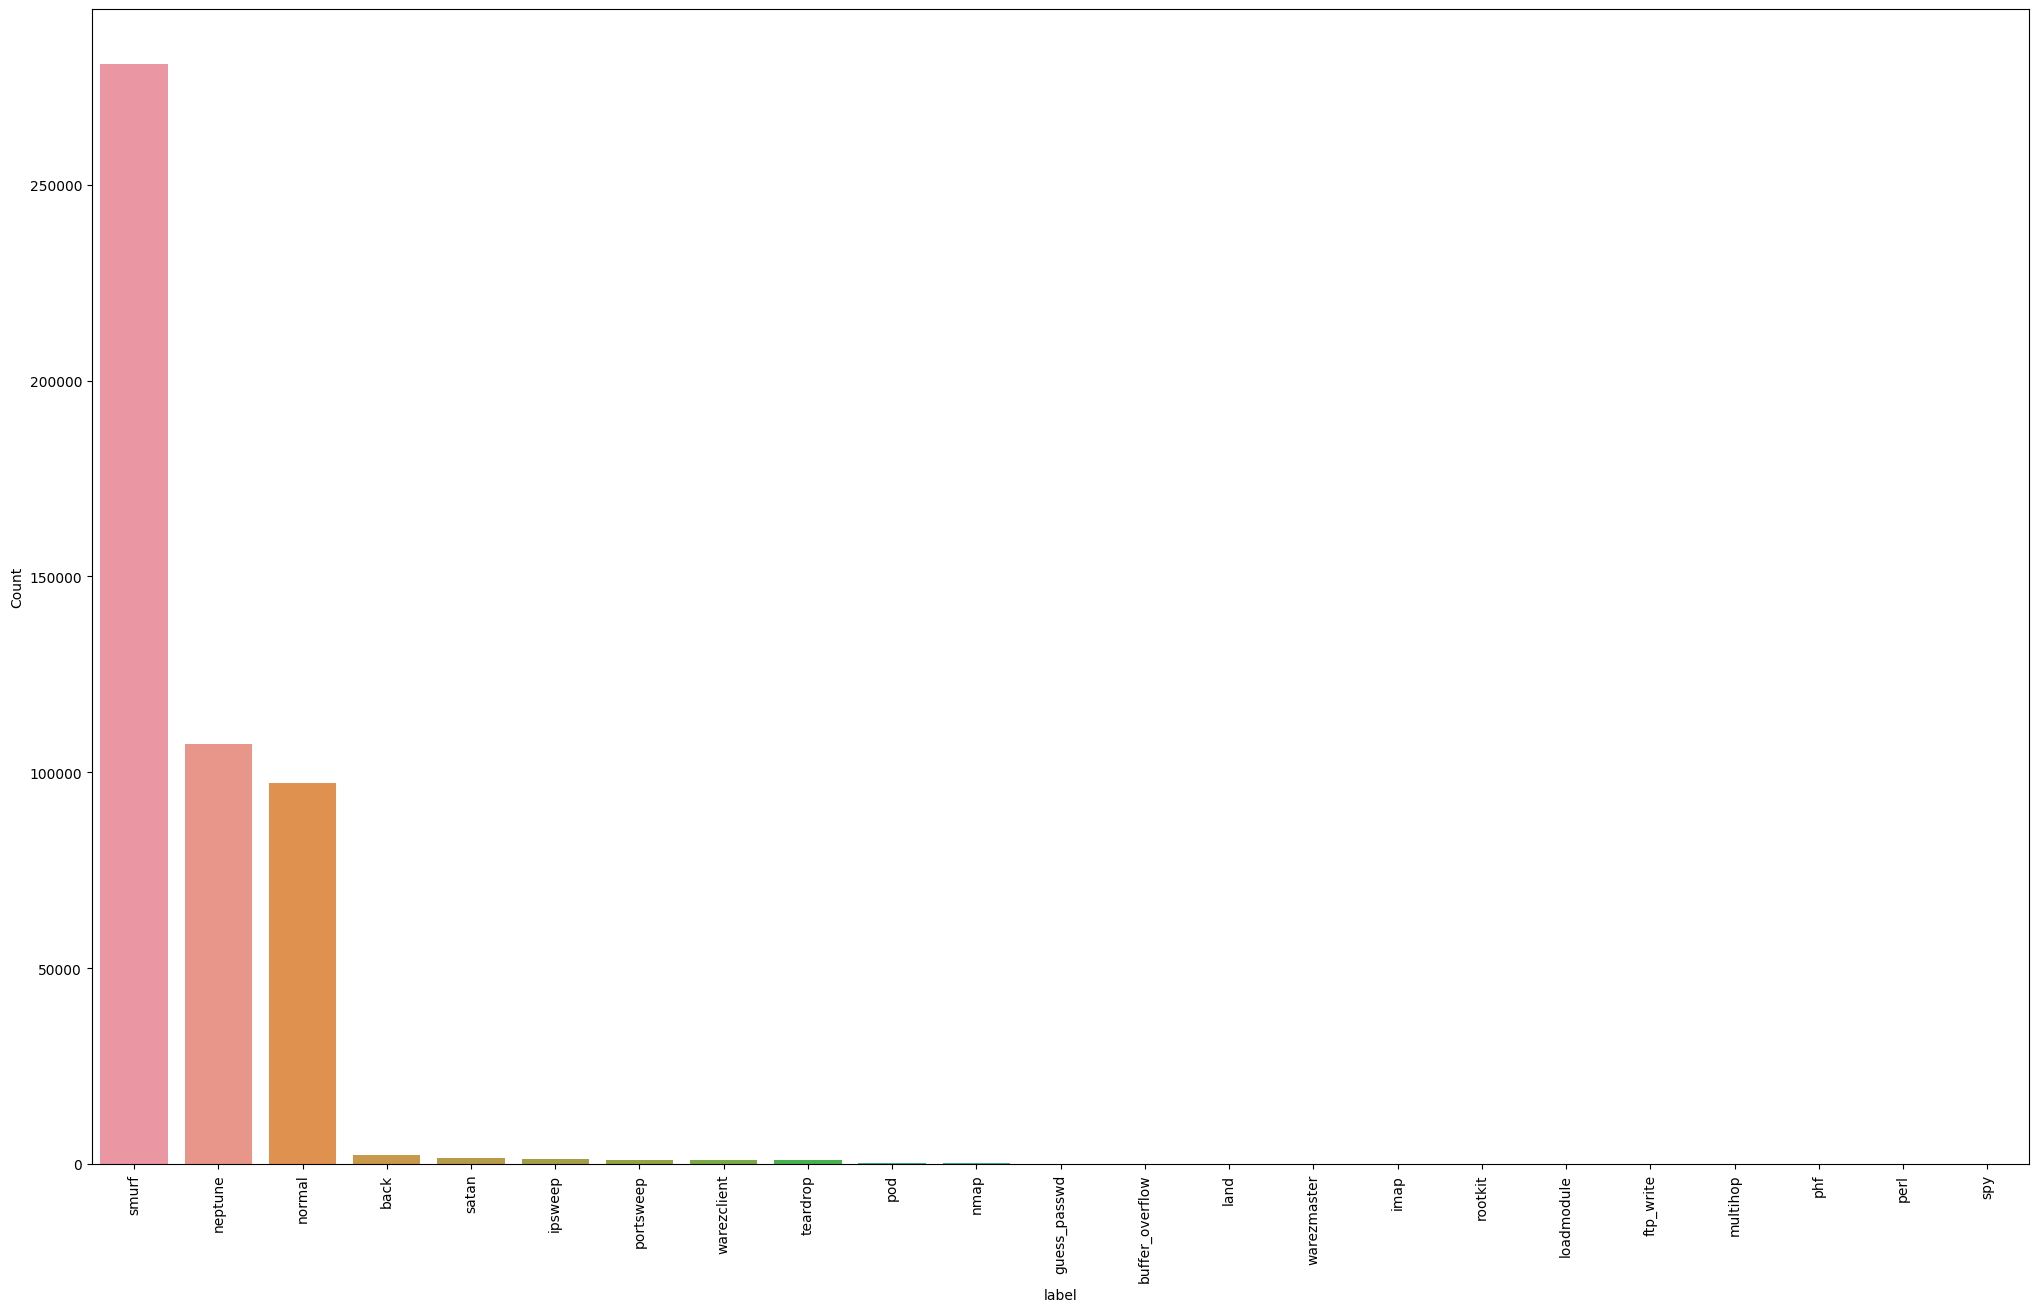

In [21]:
df6 = pd.DataFrame(columns = ['label'])
df6['label']=[each for each in df.label.unique()]
df6['Count']=[len(df[df.label==each]) for each in df6.label]
df6=df6.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df6.label.head(50), y=df6.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

### Restructuring Data and encoding to numbers

In [22]:
from sklearn.preprocessing import LabelEncoder
cat = ['protocol_type', 'service', 'flag']

# Encode Categorical Columns
le = LabelEncoder()
df[cat] = df[cat].apply(le.fit_transform)

### Correlation
We can observe that Corelations are very less

<Axes: >

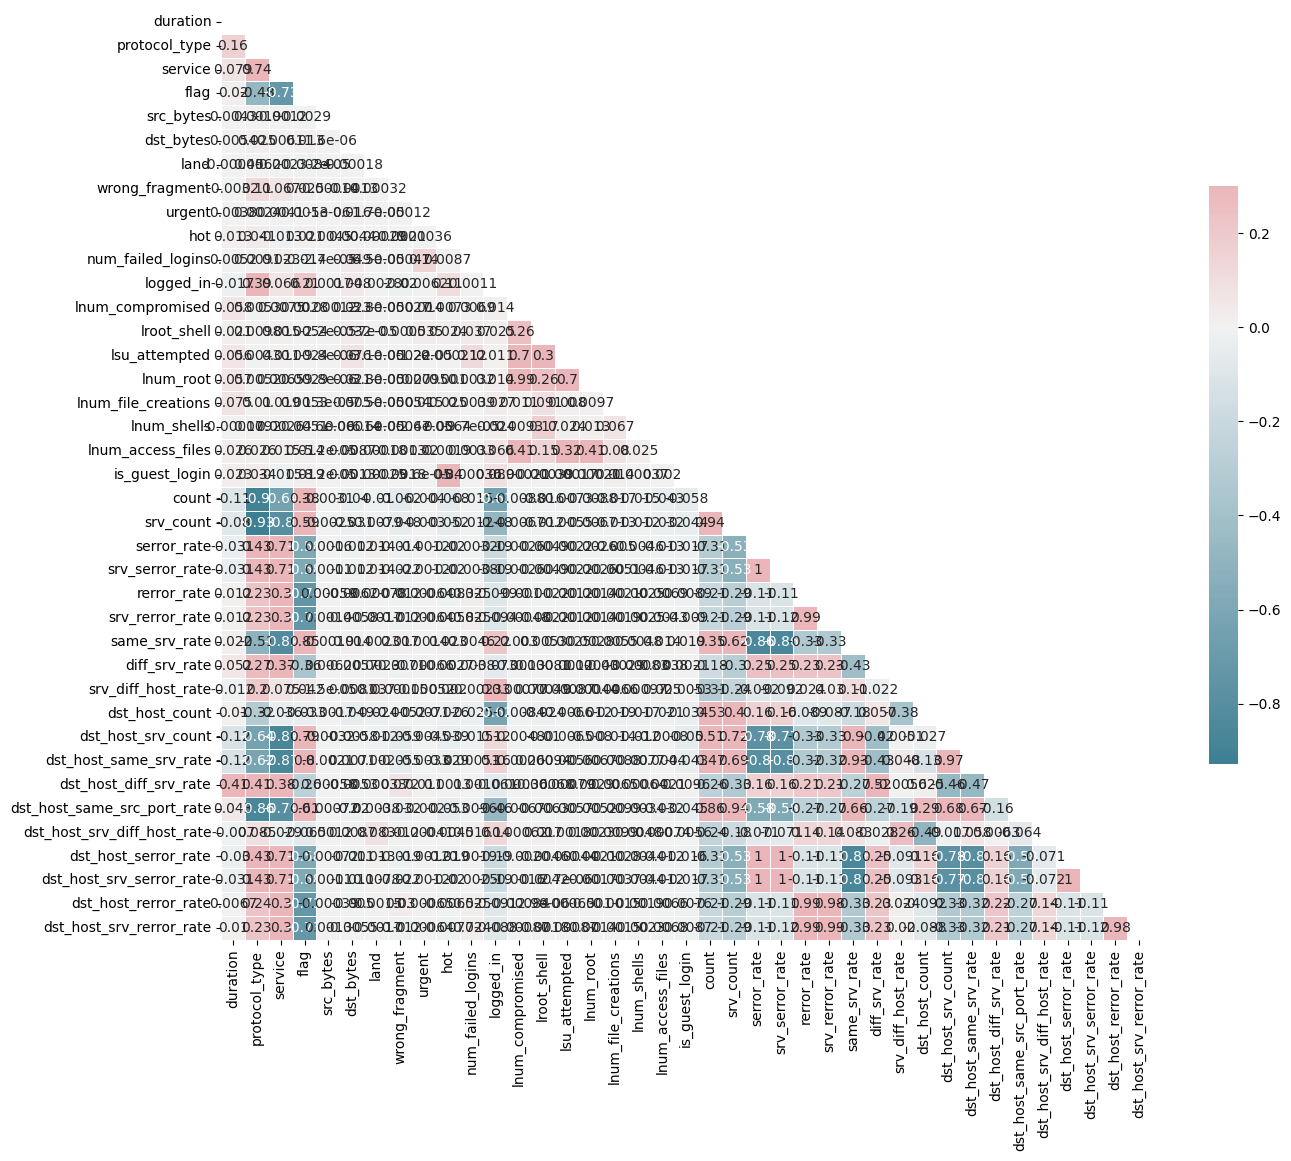

In [23]:
df_numerics_only = df.select_dtypes(include=np.number)
df_numerics_only = df_numerics_only[[col for col in df_numerics_only if df_numerics_only[col].nunique() > 1]] # Keep columns where there are more than 1 unique values

# Compute the correlation matrix
corr = df_numerics_only.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

<Axes: title={'center': 'Correlation of Attributes'}>

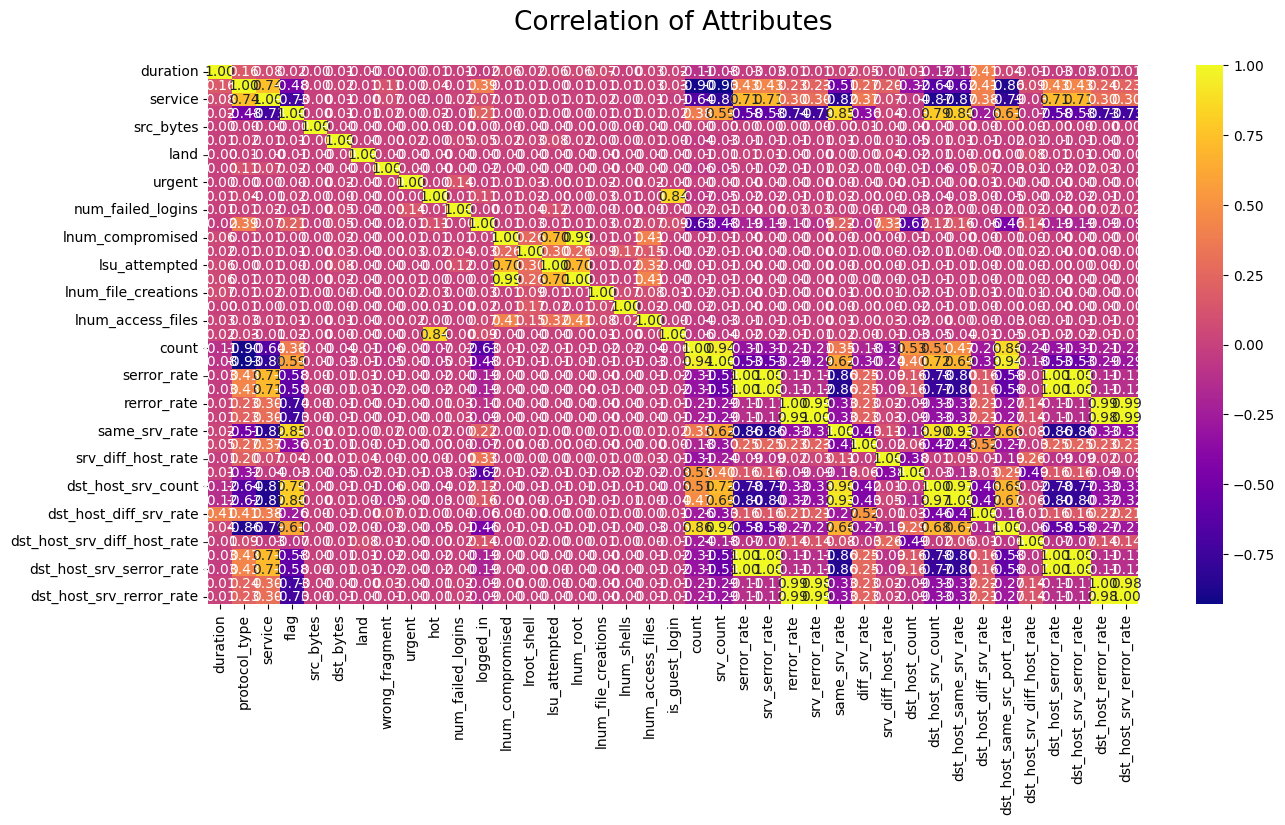

In [24]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df_numerics_only.corr(), cmap='plasma',annot=True, fmt='.2f')


## Check Outliers

## Splitting Data

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop('label', axis=1)
y = df[['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (345814, 41)
y train data (345814, 1)
x test data  (148206, 41)
y test data  (148206, 1)


In [26]:
X_train.isnull().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
lnum_compromised               False
lroot_shell                    False
lsu_attempted                  False
lnum_root                      False
lnum_file_creations            False
lnum_shells                    False
lnum_access_files              False
lnum_outbound_cmds             False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

## Scaling the Data

In [27]:
from sklearn import preprocessing

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

X_train = X_train_scaled
X_test  = X_test_scaled

In [28]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=3)

## Logistic Regression

In [29]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn import metrics

LogReg = LogisticRegression(solver = 'lbfgs', max_iter=100)
LogReg.fit(X_train, y_train.values.ravel())

# Predicting for test set
LogReg_y_pred               = LogReg.predict(X_test)
LogReg_Score                = LogReg.score(X_test, y_test)

LogReg_ScoreAccuracy        = accuracy_score(y_test, LogReg_y_pred)

LogReg_PrecisonScore        = precision_score(y_test, LogReg_y_pred, average='micro')
LogReg_RecollScore          = recall_score(y_test, LogReg_y_pred, average='micro')
LogReg_F1                   = f1_score(y_test, LogReg_y_pred, average='micro')

cross_validation_result = model_selection.cross_val_score(LogReg, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

base_model_results = pd.DataFrame([['Logistic Regression', LogReg_ScoreAccuracy, LogReg_PrecisonScore,
                                LogReg_RecollScore, LogReg_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

print('\nLogistic Regression classification Report : \n',metrics.classification_report(y_test, LogReg_y_pred))


Logistic Regression classification Report : 
                  precision    recall  f1-score   support

           back       0.99      1.00      0.99       628
buffer_overflow       0.83      0.71      0.77         7
      ftp_write       0.00      0.00      0.00         2
   guess_passwd       1.00      1.00      1.00        10
           imap       1.00      0.50      0.67         2
        ipsweep       0.96      0.97      0.97       378
           land       1.00      0.89      0.94         9
     loadmodule       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00         4
        neptune       1.00      1.00      1.00     31943
           nmap       0.86      0.83      0.84        69
         normal       1.00      1.00      1.00     29302
           perl       0.33      1.00      0.50         1
            phf       1.00      1.00      1.00         1
            pod       1.00      0.98      0.99        92
      portsweep       0.99      0.95    

## K-Nearest Neighbours

In [30]:
%%time
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=len(np.unique(y['label'])), weights = 'uniform', metric='euclidean')
Knn.fit(X_train, y_train.values.ravel())

# Predicting for test set
Knn_y_pred               = Knn.predict(X_test)
Knn_Score                = Knn.score(X_test, y_test)

Knn_ScoreAccuracy        = accuracy_score(y_test, Knn_y_pred)
Knn_PrecisonScore        = precision_score(y_test, Knn_y_pred, average='micro')
Knn_RecollScore          = recall_score(y_test, Knn_y_pred, average='micro')
Knn_F1                   = f1_score(y_test, Knn_y_pred, average='micro')

cross_validation_result = model_selection.cross_val_score(Knn, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
knn_models_results = pd.DataFrame([['K-Nearest Neighbors', Knn_ScoreAccuracy, Knn_PrecisonScore,
                                Knn_RecollScore, Knn_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

base_model_results = pd.concat([base_model_results,knn_models_results], ignore_index=True)

print('\nK-Nearest Neighbors (K-NN) classification Report : \n',metrics.classification_report(y_test, Knn_y_pred))


K-Nearest Neighbors (K-NN) classification Report : 
                  precision    recall  f1-score   support

           back       0.98      0.99      0.98       628
buffer_overflow       0.33      0.71      0.45         7
      ftp_write       0.00      0.00      0.00         2
   guess_passwd       0.77      1.00      0.87        10
           imap       0.00      0.00      0.00         2
        ipsweep       0.97      0.98      0.98       378
           land       1.00      1.00      1.00         9
     loadmodule       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00         4
        neptune       1.00      1.00      1.00     31943
           nmap       0.93      0.90      0.91        69
         normal       1.00      1.00      1.00     29302
           perl       0.00      0.00      0.00         1
            phf       0.00      0.00      0.00         1
            pod       0.99      0.99      0.99        92
      portsweep       0.99      0

## XGBoost

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
X_trainval, X_test, y_trainval, y_test = train_test_split(X.values,y, train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.5)


### To perform cross-validation, we have used the cross_val_score function from the scikit-learn library

In [33]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
le = LabelEncoder()
y_val = le.fit_transform(y_val)
le = LabelEncoder()
y_trainval = le.fit_transform(y_trainval)

In [34]:
%%time
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_trainval, y_trainval, cv=5)
scores

CPU times: total: 1h 59min 46s
Wall time: 16min 30s


array([0.99983553, 0.99974697, 0.99974697, 0.99979758, 0.99977228])

### To perform k-fold cross-validation,we have used the KFold class from the scikit-learn library

In [35]:
%%time
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_trainval, y_trainval):
    X_train, y_train = X_trainval[train_index], y_trainval[train_index]
    X_val, y_val = X_trainval[val_index], y_trainval[val_index]
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    score = model.score(X_val, y_val)
    print(f"Validation score: {score}")


Validation score: 0.9997722787308334
Validation score: 0.9997216704831547
Validation score: 0.9998481838999026
Validation score: 0.9997975785332035
Validation score: 0.9997722758498538
CPU times: total: 2h 1min 50s
Wall time: 17min


# <center>Using Deep Learning

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

### Model architecture 

In [37]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [38]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2688      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the model

In [39]:
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1)

Epoch 1/30
4941/4941 [==============================] - 10s 2ms/step - loss: -566547520.0000 - accuracy: 6.9582e-05
Epoch 2/30
4941/4941 [==============================] - 9s 2ms/step - loss: -3025009408.0000 - accuracy: 6.6419e-05
Epoch 3/30
4941/4941 [==============================] - 9s 2ms/step - loss: -6972988928.0000 - accuracy: 6.6419e-05
Epoch 4/30
4941/4941 [==============================] - 8s 2ms/step - loss: -14395538432.0000 - accuracy: 6.6419e-05
Epoch 5/30
4941/4941 [==============================] - 9s 2ms/step - loss: -47259594752.0000 - accuracy: 6.6419e-05
Epoch 6/30
4941/4941 [==============================] - 8s 2ms/step - loss: -85555511296.0000 - accuracy: 6.6419e-05
Epoch 7/30
4941/4941 [==============================] - 8s 2ms/step - loss: -125452148736.0000 - accuracy: 6.6419e-05
Epoch 8/30
4941/4941 [==============================] - 8s 2ms/step - loss: -182901587968.0000 - accuracy: 6.6419e-05
Epoch 9/30
4941/4941 [==============================] - 8s 2ms/st

### Evaluate its performance on the testing set

In [40]:
# Evaluate the model on the testing set
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % accuracy)


3088/3088 [==============================] - 6s 2ms/step - loss: -9952126042112.0000 - accuracy: 6.0726e-05
Accuracy: 0.00


### Make predictions on the testing set

In [41]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


3088/3088 [==============================] - 5s 1ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       445
           1       0.00      1.00      0.00         6
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00       251
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00     21376
          10       0.00      0.00      0.00        41
          11       0.00      0.00      0.00     19401
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        55
          15       0.00      0.00      0.00       187
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00       318
          18       0.00 

## Conclusion

###  Xgboost model gave better output with highest precision and recall . Following KNN and Logistic Regression.

But Deep Learning Model gave the worst result but we can improve in future by increasing the number of neurons and the hyperparameters.